In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from keras.models import model_from_json
import os

json_string = open("/content/drive/MyDrive/Colab Notebooks/akimoto/gan_models/gen_model.json").read()
generator = model_from_json(json_string)

generator.summary()

generator.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

generator.load_weights("/content/drive/MyDrive/Colab Notebooks/akimoto/gan_models/gen_weights.hdf5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 32, 32, 256)      524544    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 32, 32, 256)      

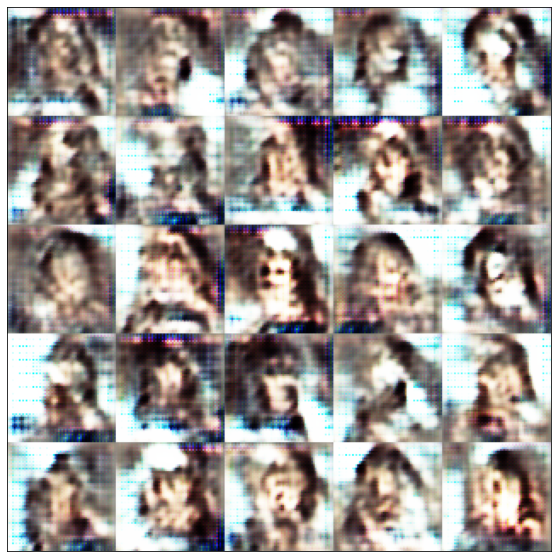

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



n_cols = 5
n_rows = 5
img_size = 64

random_latent_vectors = tf.random.normal(shape = (n_cols*n_rows, img_size*2))
fake = generator(random_latent_vectors)

#  生成された画像を並べて一枚の画像にする
matrix_image = np.zeros((img_size*n_rows, img_size*n_cols, 3))
for r in range(n_rows):
    for c in range(n_cols):
        # img = keras.preprocessing.image.array_to_img(fake[r*n_rows+c])
        matrix_image[r*img_size : (r+1)*img_size, c*img_size: (c+1)*img_size] = fake[r*n_rows+c]

plt.figure(figsize=(10, 10))
plt.imshow(matrix_image, cmap="Greys_r")
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # 軸目盛りのラベルと線を消す
plt.show()